# LUNA experiment: grid search of regularization and diversification

In this notebook, we performed experiments on LUNA trained with 3 auxiliary functions with a grid search of regularization and diversification, and compared to results to NLM on the 1-D cubic gap dataset.

In [1]:
import time
import sys; sys.path.insert(0, "..")
import os; imagePath = os.path.abspath('..') + '/images/'
from src.models import NLM, LUNA
from src.utils import generate_data, format_time, neg_log_likelihood, epistemic_uncertainty

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

## Generate toy data

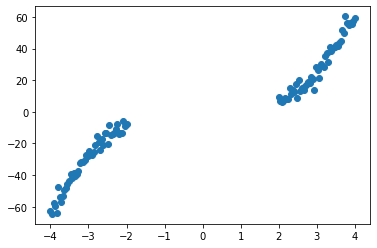

In [3]:
x, y, x_test, y_test = generate_data(number_of_points=50, noise_variance=9)
plt.scatter(x, y)
plt.show()

# Extract test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = y_test[gap_idx].reshape(1,-1)

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = y_test[non_gap_idx].reshape(1,-1)

## Define function for training NLM and LUNA

In [4]:
def experiment_LUNA_1D(n_aux, reg_param, lambda_in, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn,
        'auxiliary_functions': n_aux,
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param,
        'lambda_in': lambda_in,
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    luna = LUNA(architecture, random=random)
    print("")
    print(f"===== [ Aux Functions: {n_aux} ] === [ Regularization: {reg_param} ] === [ Diversification: {lambda_in} ] =====")
    print("")
    t0 = time.time()
    luna.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return luna

In [5]:
def experiment_NLM_1D(reg_param, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    nlm = NLM(architecture, random=random)
    print("")
    print(f"===== NLM [ Regularization: {reg_param} ]  =====")
    print("")
    t0 = time.time()
    nlm.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return nlm

## Set hyperparameters

In [6]:
n_aux = 3
reg_grid = [0., 100., 300., 600., 1000., 3000., 6000.]
div_grid = [0., 10., 100., 1000., 10000.]

step_size = 1e-2
max_iteration_nlm = 2000
max_iteration_luna = 2000

## Fit with NLM and LUNA

In [17]:
nlm_list = []
for reg in reg_grid:
    nlm = experiment_NLM_1D(reg, step_size = step_size, max_iteration = max_iteration_nlm)
    nlm_list.append(nlm)


===== NLM [ Regularization: 0.0 ]  =====

Iteration 0 loss 8780.37577462363; gradient mag: 19881.89475684885
Iteration 100 loss 100.27374969899581; gradient mag: 91.4245504189701
Iteration 200 loss 29.442747894960913; gradient mag: 35.662692701774716
Iteration 300 loss 12.661133412585764; gradient mag: 20.058837354449604
Iteration 400 loss 9.323851347072155; gradient mag: 3.5346023391804895
Iteration 500 loss 8.962734868505036; gradient mag: 5.9170520831332745
Iteration 600 loss 8.862786255766911; gradient mag: 3.8716418131119616
Iteration 700 loss 8.826926324306633; gradient mag: 2.085566205456196
Iteration 800 loss 8.802904419868934; gradient mag: 3.901173048915124
Iteration 900 loss 8.77848445840589; gradient mag: 1.9048776612133063
Iteration 1000 loss 8.760578370752826; gradient mag: 2.643247025238827
Iteration 1100 loss 8.750272744468509; gradient mag: 2.3638372432824
Iteration 1200 loss 8.743284083035402; gradient mag: 3.127555412201348
Iteration 1300 loss 8.738421601240683; gra

Iteration 1000 loss 247.8292967035127; gradient mag: 26.522188341944577
Iteration 1100 loss 219.41286951664551; gradient mag: 23.6080255714616
Iteration 1200 loss 196.71736252712125; gradient mag: 21.362055756865377
Iteration 1300 loss 178.50085420208424; gradient mag: 18.99294745818307
Iteration 1400 loss 163.8915831079116; gradient mag: 17.22548595865869
Iteration 1500 loss 152.22773883762505; gradient mag: 15.442225054090457
Iteration 1600 loss 142.93116539816197; gradient mag: 13.781162380128379
Iteration 1700 loss 135.5434726210735; gradient mag: 12.530262241514906
Iteration 1800 loss 129.65687088176665; gradient mag: 11.415230839913715
Iteration 1900 loss 125.04432274852174; gradient mag: 9.980766718013408

Training took 0:00:37 (h:mm:ss)

===== NLM [ Regularization: 6000.0 ]  =====

Iteration 0 loss 15165.122773644805; gradient mag: 19894.152214624486
Iteration 100 loss 3001.7294902922563; gradient mag: 193.21013148173142
Iteration 200 loss 1746.470266099513; gradient mag: 123.6

In [8]:
luna_list = []
for div in div_grid:
    for reg in reg_grid:
        luna = experiment_LUNA_1D(n_aux, reg, div, step_size = step_size, max_iteration = max_iteration_luna)
        luna_list.append(luna)
        


===== [ Aux Functions: 3 ] === [ Regularization: 0.0 ] === [ Diversification: 0.0 ] =====

Iteration 0 loss 6264.7590636575305; gradient mag: 9353.382355089769
Iteration 100 loss 20.833523663982298; gradient mag: 19.84995581280745
Iteration 200 loss 12.296919028663934; gradient mag: 7.97896551008719
Iteration 300 loss 10.066108668618693; gradient mag: 3.857372407076635
Iteration 400 loss 9.352076273235516; gradient mag: 2.3113608707039197
Iteration 500 loss 9.096980684016883; gradient mag: 2.6246573045455106
Iteration 600 loss 8.945770742928229; gradient mag: 3.5339066560190093
Iteration 700 loss 8.84496527592567; gradient mag: 3.085413752121236
Iteration 800 loss 8.660573217148613; gradient mag: 5.39217733592586
Iteration 900 loss 8.596656480010505; gradient mag: 2.5226015344799024
Iteration 1000 loss 8.562053350075326; gradient mag: 2.5023382318054788
Iteration 1100 loss 8.541904306553462; gradient mag: 3.663038050306235
Iteration 1200 loss 8.532712609788273; gradient mag: 2.7114649

Iteration 600 loss 333.2905307275153; gradient mag: 30.22234306345764
Iteration 700 loss 275.65137476557874; gradient mag: 26.606141717056893
Iteration 800 loss 235.61102693281467; gradient mag: 21.582255873724588
Iteration 900 loss 207.81599035612385; gradient mag: 18.53565046445386
Iteration 1000 loss 188.03530296354694; gradient mag: 15.922818355607644
Iteration 1100 loss 173.86522700668172; gradient mag: 13.301953764600713
Iteration 1200 loss 163.40701897272925; gradient mag: 11.495624155656543
Iteration 1300 loss 155.76578431141166; gradient mag: 10.10767610092805
Iteration 1400 loss 150.16232805649634; gradient mag: 8.862711369648487
Iteration 1500 loss 146.0572603267491; gradient mag: 7.79826383156086
Iteration 1600 loss 143.0813104573973; gradient mag: 6.574673706695622
Iteration 1700 loss 140.90427147264455; gradient mag: 5.995659598403631
Iteration 1800 loss 139.29848222562362; gradient mag: 5.128461331985671
Iteration 1900 loss 138.12805231638882; gradient mag: 4.90743062146

Iteration 1200 loss 117.54719750343493; gradient mag: 11.164579279419844
Iteration 1300 loss 111.80871677470145; gradient mag: 31.2817128617037
Iteration 1400 loss 101.10318442249192; gradient mag: 8.836050852401428
Iteration 1500 loss 94.48652415112655; gradient mag: 17.940058282789142
Iteration 1600 loss 88.77399163713358; gradient mag: 6.867436956864393
Iteration 1700 loss 83.95784892148212; gradient mag: 7.514148639595004
Iteration 1800 loss 79.61252973599083; gradient mag: 5.9300752206750165
Iteration 1900 loss 75.96818186731052; gradient mag: 10.59864391315134

Training took 0:00:49 (h:mm:ss)

===== [ Aux Functions: 3 ] === [ Regularization: 1000.0 ] === [ Diversification: 10.0 ] =====

Iteration 0 loss 7286.35468880689; gradient mag: 9355.849688097307
Iteration 100 loss 660.0703292239903; gradient mag: 34.778959556935234
Iteration 200 loss 506.73079896500246; gradient mag: 26.585439638603678
Iteration 300 loss 417.73281512383; gradient mag: 23.710308278222765
Iteration 400 loss 

Iteration 1900 loss 131.73339614388112; gradient mag: 86.98750663408894

Training took 0:00:50 (h:mm:ss)

===== [ Aux Functions: 3 ] === [ Regularization: 300.0 ] === [ Diversification: 100.0 ] =====

Iteration 0 loss 6665.178790489522; gradient mag: 9356.223223491623
Iteration 100 loss 327.0276595429373; gradient mag: 75.35137911740146
Iteration 200 loss 284.7257699808157; gradient mag: 107.7637611261708
Iteration 300 loss 267.53624665071555; gradient mag: 82.00673486371123
Iteration 400 loss 250.9683911586965; gradient mag: 92.20398073028568
Iteration 500 loss 241.4719912812377; gradient mag: 118.5935806821729
Iteration 600 loss 227.31148009751317; gradient mag: 59.420770744562056
Iteration 700 loss 218.949119819859; gradient mag: 157.20023420311253
Iteration 800 loss 211.58152986724082; gradient mag: 130.3535194696468
Iteration 900 loss 203.26130236326497; gradient mag: 152.51696246234613
Iteration 1000 loss 191.14890894070737; gradient mag: 124.07997846677695
Iteration 1100 loss 19

Iteration 400 loss 471.12578636241443; gradient mag: 2583.9553258240794
Iteration 500 loss 460.68836991027433; gradient mag: 2949.1913692467942
Iteration 600 loss 455.6995918382853; gradient mag: 3822.931189072996
Iteration 700 loss 442.75371429700454; gradient mag: 2675.4924877100607
Iteration 800 loss 442.52599724900335; gradient mag: 2897.863297654328
Iteration 900 loss 765.6210724672457; gradient mag: 1491.7602231331941
Iteration 1000 loss 727.1179528418835; gradient mag: 166.51428212072682
Iteration 1100 loss 727.8342980679242; gradient mag: 3371.190274240504
Iteration 1200 loss 718.0271955762455; gradient mag: 1234.27125640841
Iteration 1300 loss 714.255966384878; gradient mag: 955.4848579388591
Iteration 1400 loss 722.2189659553528; gradient mag: 3026.1419553251276
Iteration 1500 loss 714.1053778568995; gradient mag: 1051.2187840638653
Iteration 1600 loss 714.4243856161307; gradient mag: 718.1082935606121
Iteration 1700 loss 711.6456669419971; gradient mag: 1460.5186307691995
It

Iteration 1100 loss 870.4491939564494; gradient mag: 61.056927238484015
Iteration 1200 loss 828.0439657063249; gradient mag: 186.10279743573145
Iteration 1300 loss 790.997736279532; gradient mag: 463.4976858841731
Iteration 1400 loss 758.4911582985695; gradient mag: 271.23113504360754
Iteration 1500 loss 730.5910624372522; gradient mag: 93.78663151955169
Iteration 1600 loss 708.9552153102766; gradient mag: 911.973083041915
Iteration 1700 loss 685.4140474052273; gradient mag: 51.63207475956771
Iteration 1800 loss 667.2884959658281; gradient mag: 58.72427234250883
Iteration 1900 loss 654.9347323883732; gradient mag: 990.788605662635

Training took 0:00:57 (h:mm:ss)

===== [ Aux Functions: 3 ] === [ Regularization: 6000.0 ] === [ Diversification: 1000.0 ] =====

Iteration 0 loss 13301.33411239792; gradient mag: 9500.202624691308
Iteration 100 loss 3932.2569818076054; gradient mag: 2588.947101380268
Iteration 200 loss 2894.551023177348; gradient mag: 5560.807159214724
Iteration 300 loss 23

Iteration 1800 loss 3477.1645916096313; gradient mag: 18549.439599894034
Iteration 1900 loss 3446.2726920042023; gradient mag: 7084.031806366195

Training took 0:00:49 (h:mm:ss)

===== [ Aux Functions: 3 ] === [ Regularization: 1000.0 ] === [ Diversification: 10000.0 ] =====

Iteration 0 loss 17079.378190525462; gradient mag: 10397.103159964572
Iteration 100 loss 5681.147966572871; gradient mag: 72097.13940253734
Iteration 200 loss 3397.8869423882907; gradient mag: 6673.275579937018
Iteration 300 loss 3354.3303479645447; gradient mag: 4358.551741747668
Iteration 400 loss 11521.48488447125; gradient mag: 5907.056780388398
Iteration 500 loss 8324.965192898371; gradient mag: 62523.08514410405
Iteration 600 loss 7787.444265050984; gradient mag: 4417.8157491774555
Iteration 700 loss 3565.4748023172638; gradient mag: 12853.637656546754
Iteration 800 loss 3463.451519824973; gradient mag: 12389.520302549821
Iteration 900 loss 3730.7430048374863; gradient mag: 43971.729897339144
Iteration 1000 

## Plot auxiliary functions after fitting

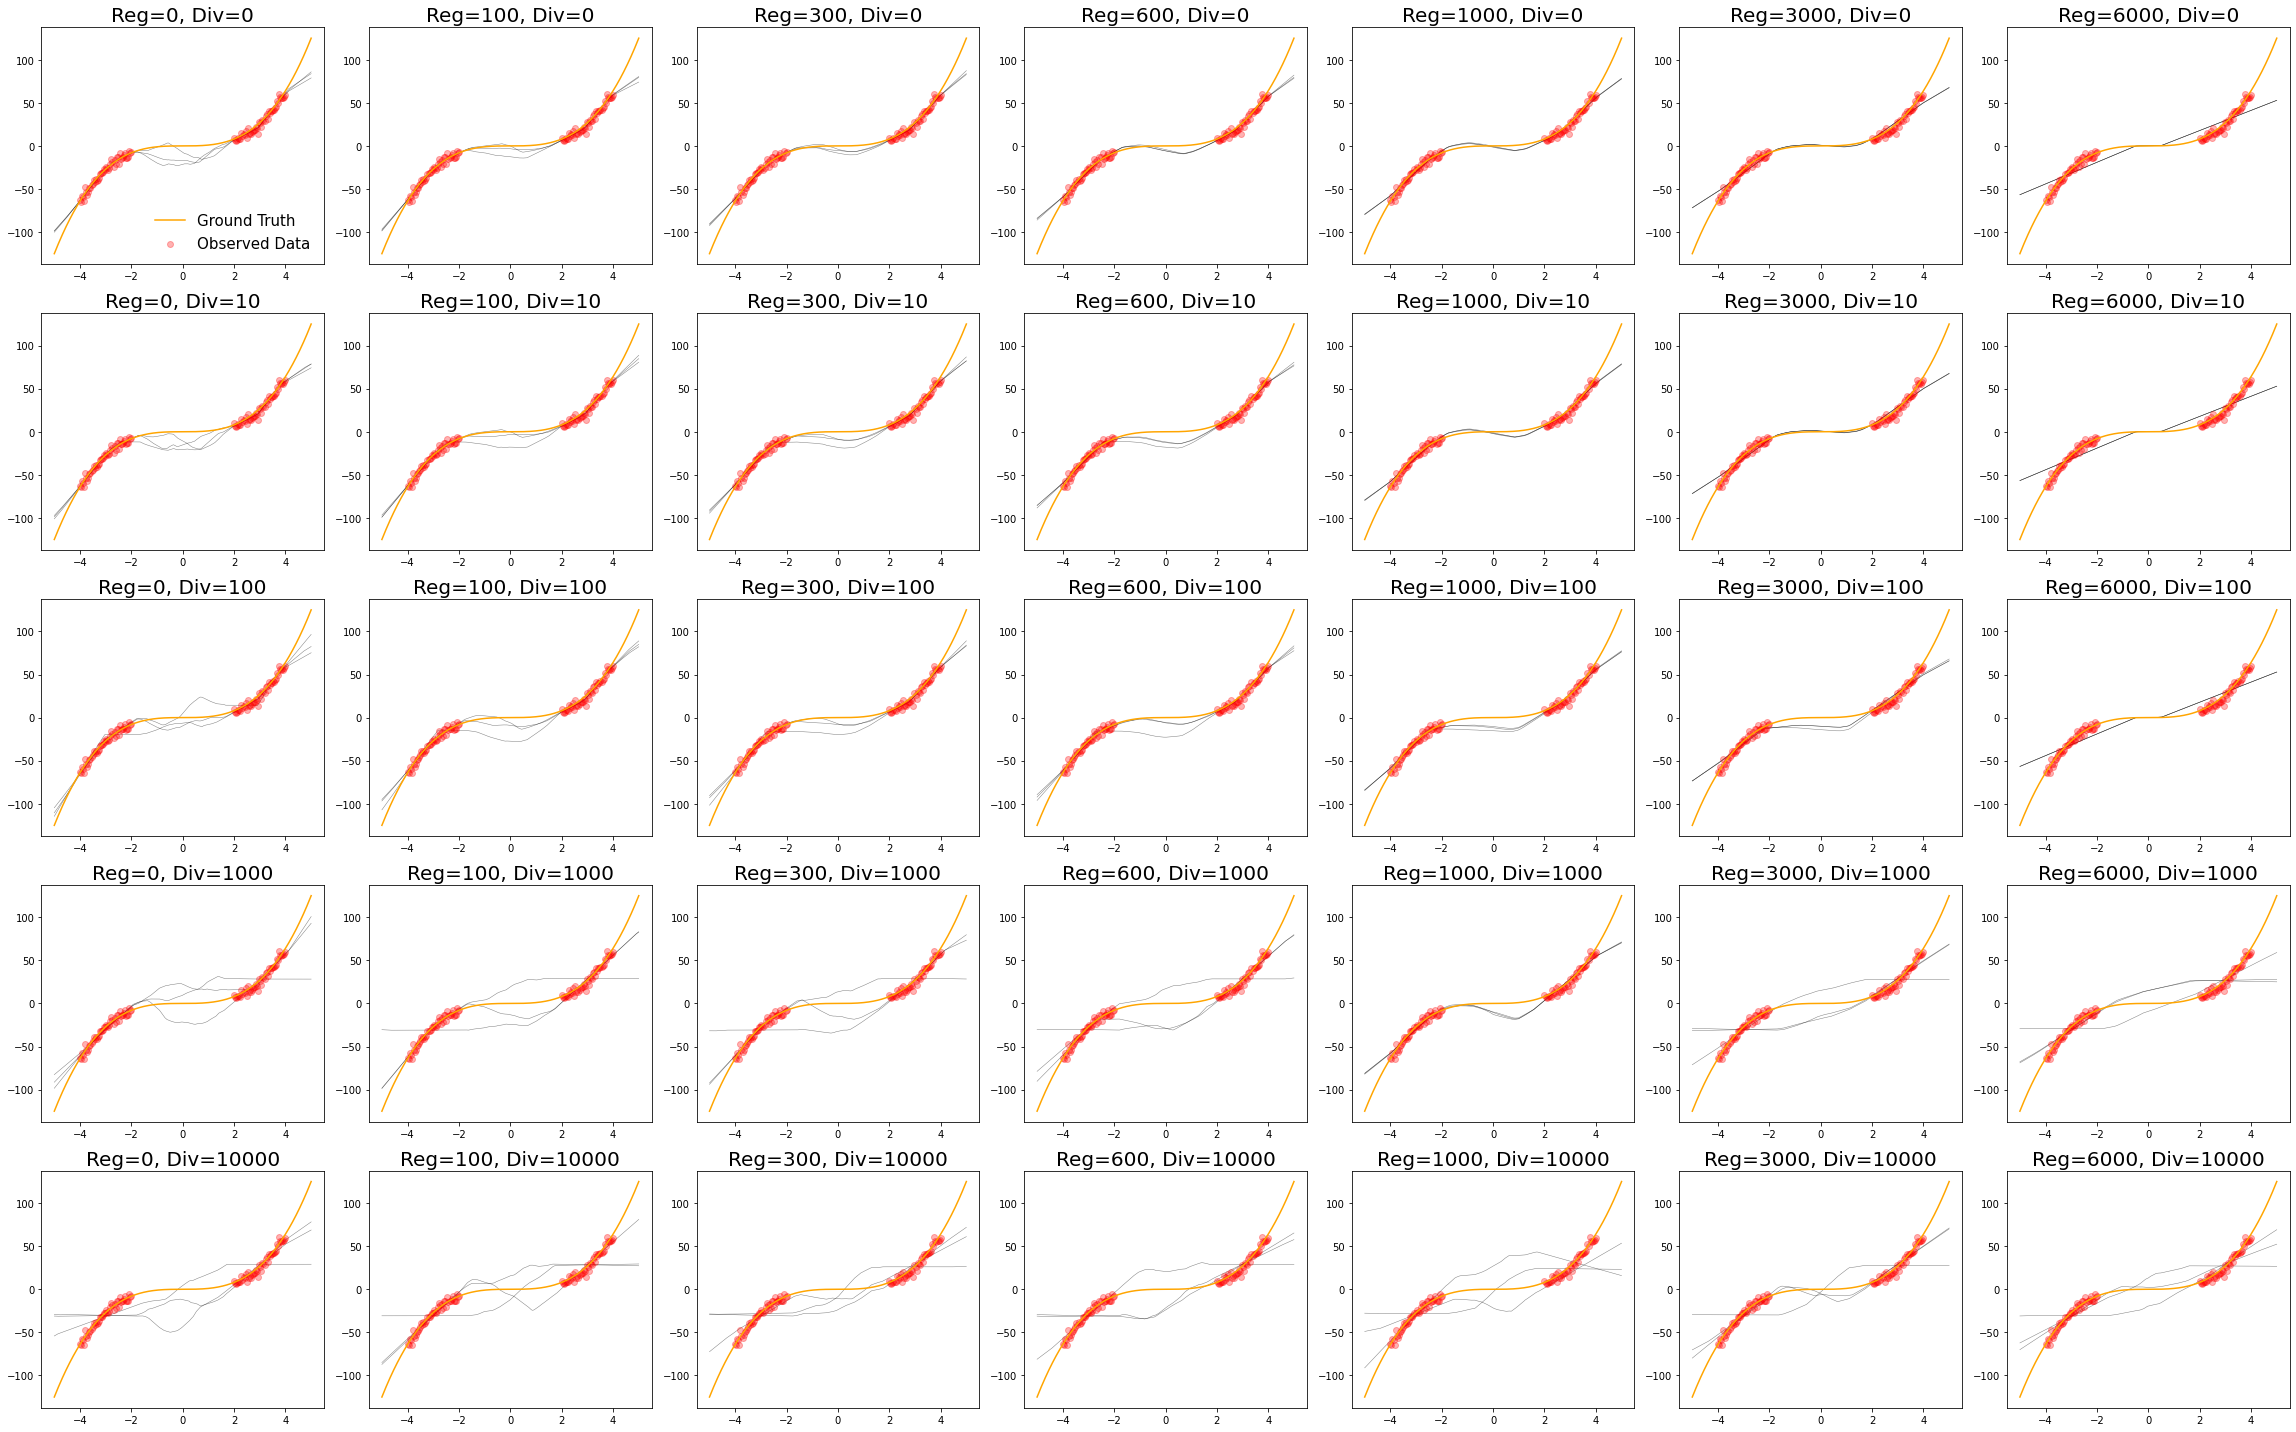

In [33]:
fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_pred = luna.forward(luna.weights, x_test)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], y_test[0,:], color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], np.squeeze(y_pred).T, color='black', linewidth=0.5, alpha=0.5, zorder=0)
#     ax.set_title(f"Auxiliary Functions\n[Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]",fontsize = 20)
    ax.set_title(f"Reg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize = 20)
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'aux_funcs_3_aux_2000_steps.png',dpi = 150)
plt.show()

## Plot prior samples

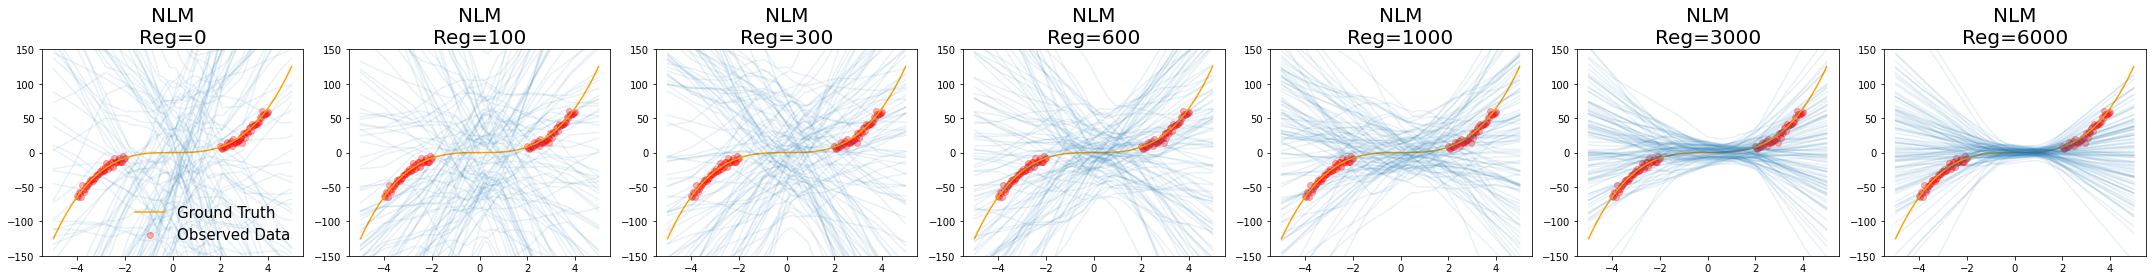

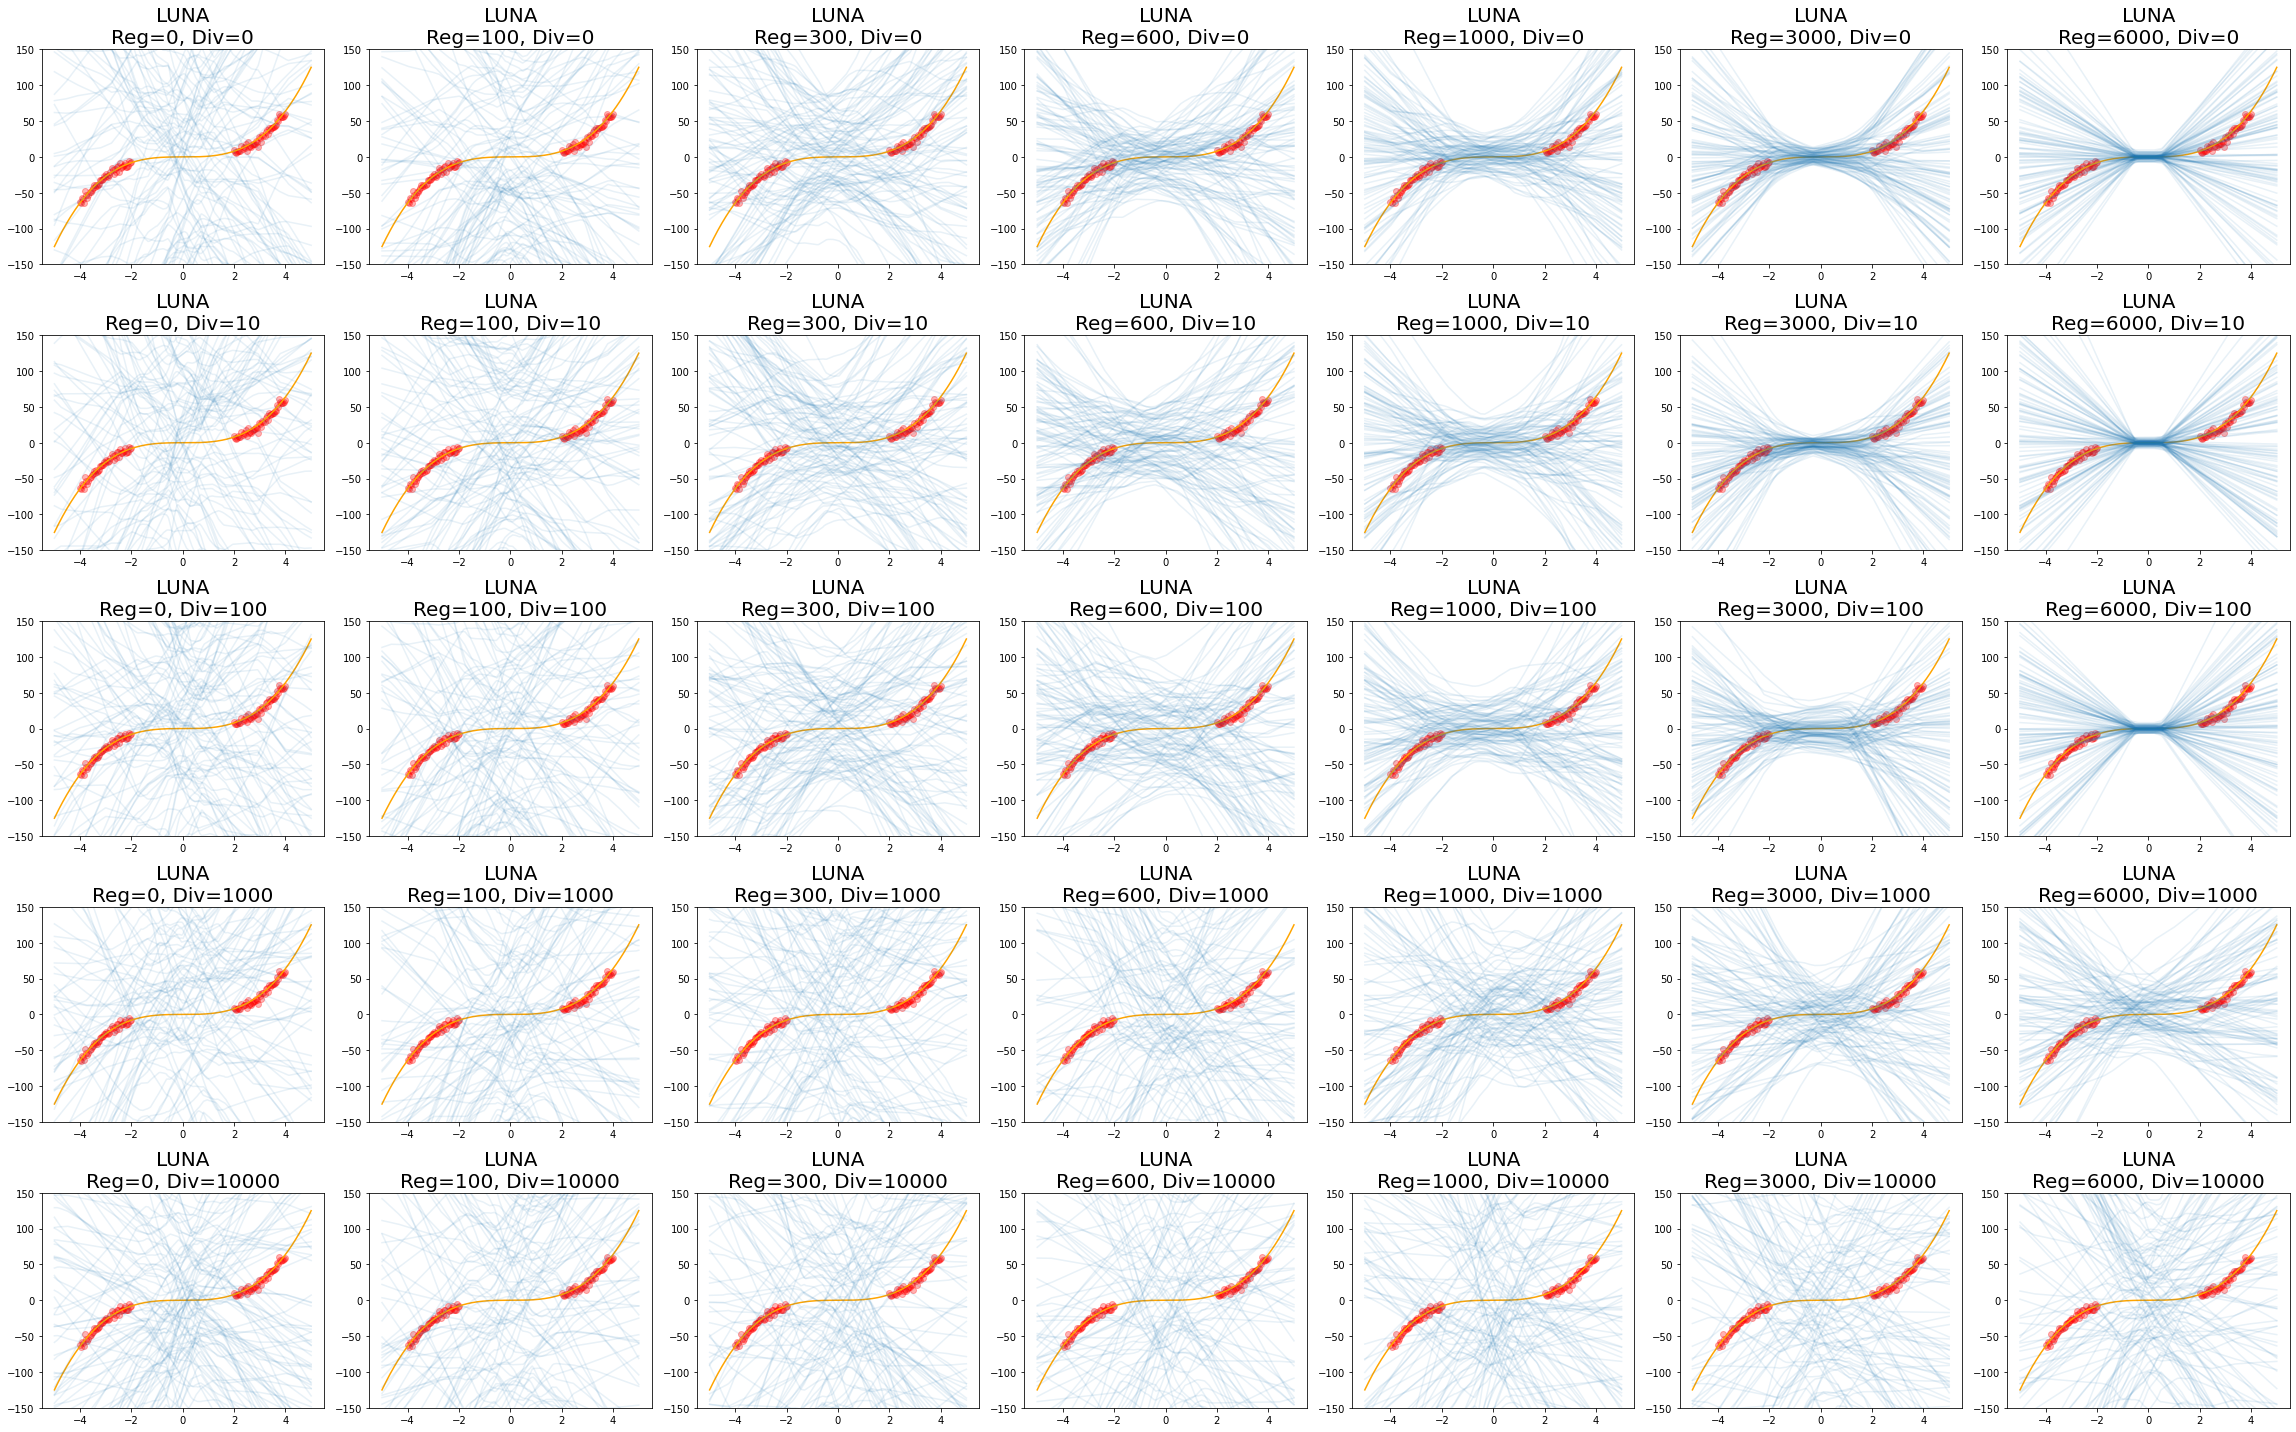

In [34]:
prior_mean = 0; prior_var = 9; noise_var = 9

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize = 20)
    ax.set_ylim([-150, 150])
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon=False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'prior_samples_NLM_3_aux_2000_steps.png',dpi = 150)
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_prior = luna.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]",fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon=False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'prior_samples_LUNA_3_aux_2000_steps.png',dpi = 150)
plt.show()

## Plot posterior samples

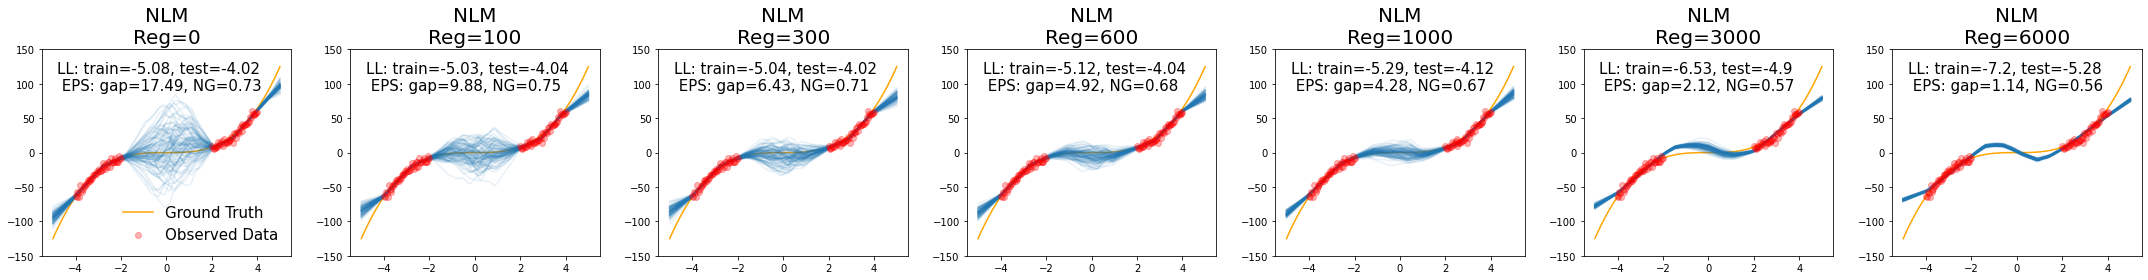

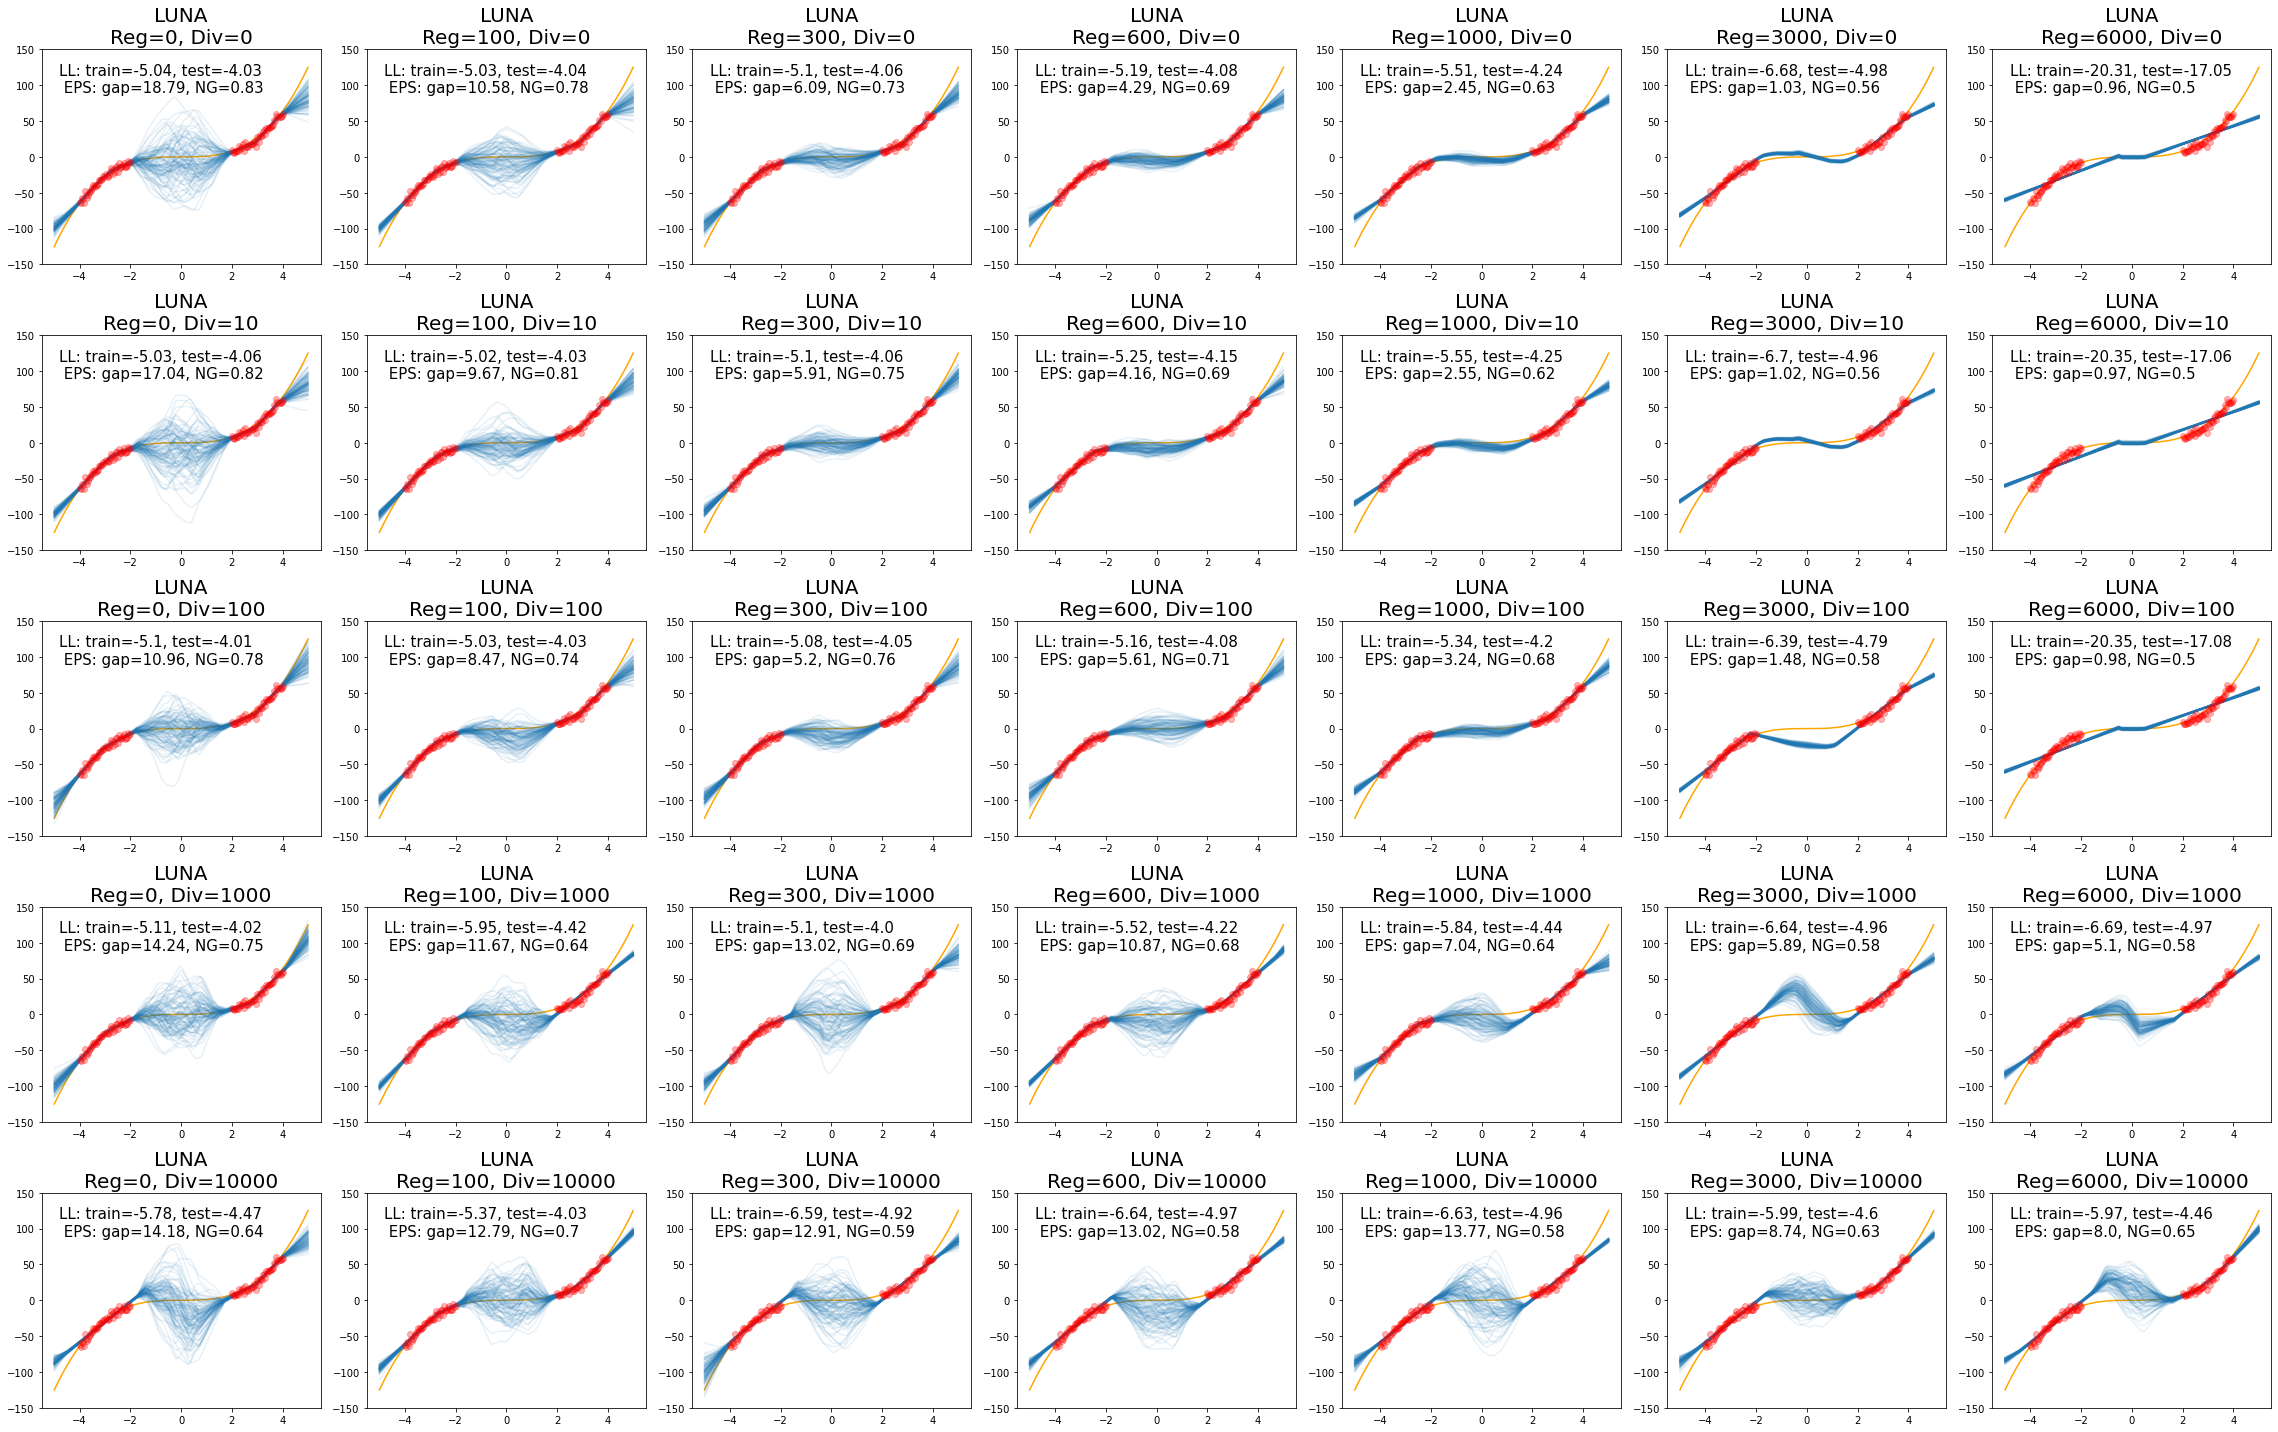

In [35]:
nll_train_list_nlm = []
nll_test_list_nlm = []
eps_gap_list_nlm = []
eps_non_gap_list_nlm = []

fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_nlm.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_nlm.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    ax.text(-4.8,90, f"LL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\n EPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}", fontsize=15)
    
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize=20)
#     ax.set_title(f"NLM\nReg={reg_grid[i]}\nLL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}",fontsize=20)

    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'post_samples_NLM_3_aux_2000_steps.png',dpi = 150)
plt.show()


nll_train_list_luna = []
nll_test_list_luna = []
eps_gap_list_luna = []
eps_non_gap_list_luna = []

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = luna.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = luna.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = luna.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_luna.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_luna.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_luna.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    
    ax.text(-4.8,90, f"LL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\n EPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}", fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)
#     ax.set_title(f"LUNA\nReg={luna.params['reg_param']}, Div={luna.params['lambda_in']}\nLL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}",fontsize=20)
#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL: train={nll_train_list_luna[i]}, test={nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}",fontsize=20)
#     ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'post_samples_LUNA_3_aux_2000_steps.png',dpi = 150)
plt.show()

## Plot posterior predictive intervals

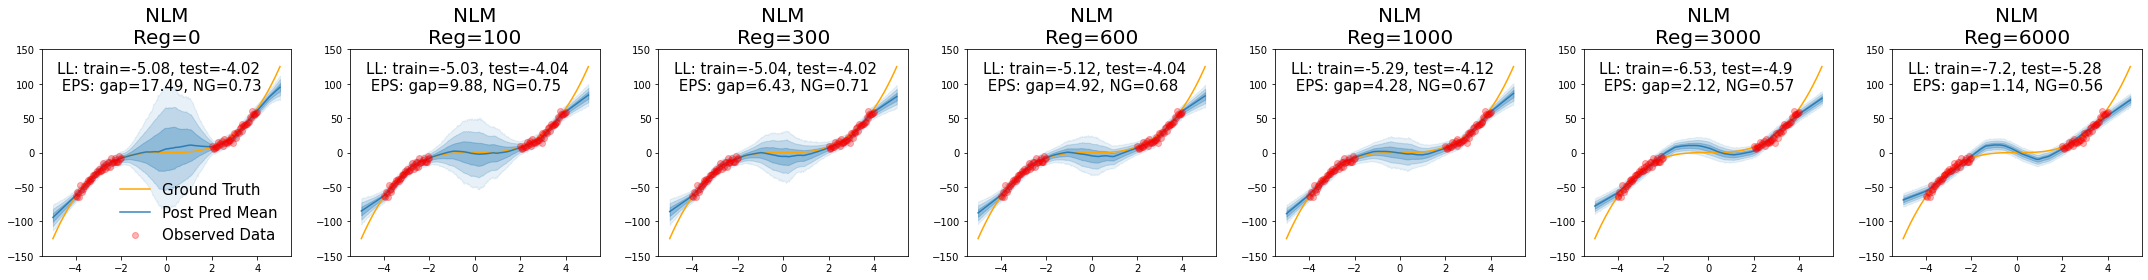

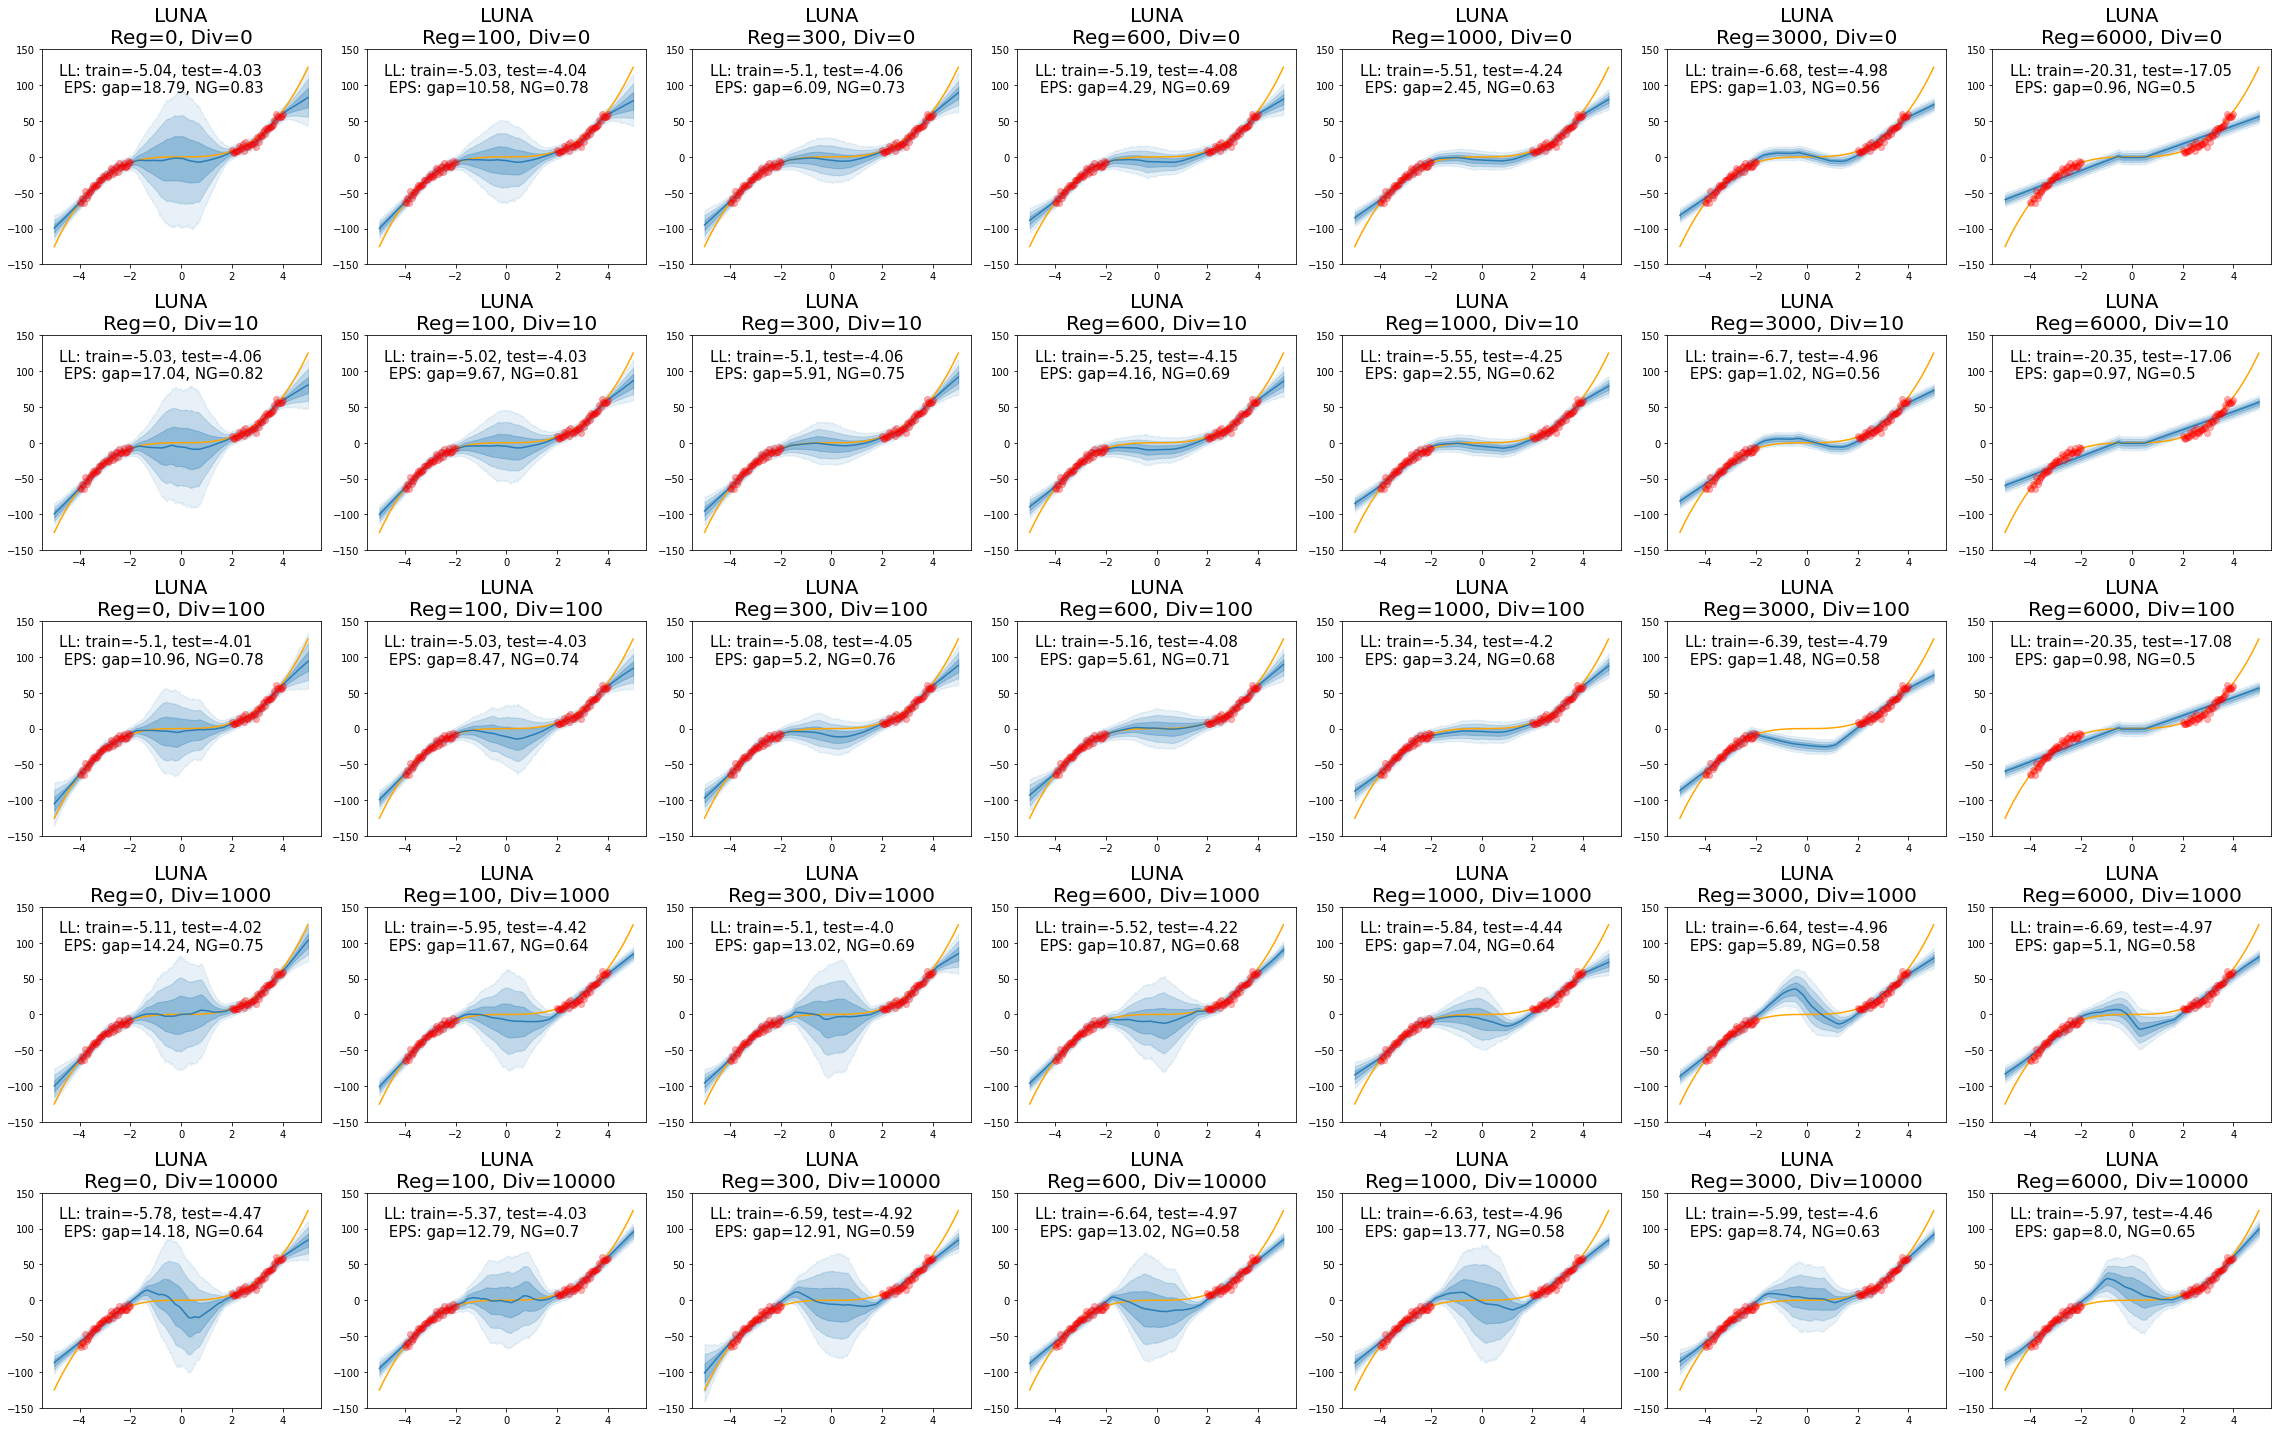

In [36]:
fig, axes = plt.subplots(1, len(reg_grid), figsize=(30, 4))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Post Pred Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])
    ax.text(-4.8,90, f"LL: train={-nll_train_list_nlm[i]}, test={-nll_test_list_nlm[i]}\n EPS: gap={eps_gap_list_nlm[i]}, NG={eps_non_gap_list_nlm[i]}", fontsize=15)
    
    ax.set_title(f"NLM\nReg={int(reg_grid[i])}",fontsize=20)
    if i == 0:
        ax.legend(loc=4,fontsize = 15, frameon = False)

#     ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=20)

#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'PPI_NLM_3_aux_2000_steps.png',dpi = 150)
plt.show()

fig, axes = plt.subplots(len(div_grid), len(reg_grid), figsize=(32, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])  
    ax.text(-4.8,90, f"LL: train={-nll_train_list_luna[i]}, test={-nll_test_list_luna[i]}\n EPS: gap={eps_gap_list_luna[i]}, NG={eps_non_gap_list_luna[i]}", fontsize=15)
    ax.set_title(f"LUNA\nReg={int(luna.params['reg_param'])}, Div={int(luna.params['lambda_in'])}",fontsize=20)

#     ax.set_title(f"LUNA: [Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL: train={nll_train_list_luna[i]}, test={nll_test_list_luna[i]}\nEPS: gap={eps_gap_list_luna[i]}, non-gap={eps_non_gap_list_luna[i]}",fontsize=20)
#     if i == 0:
#         ax.legend(loc='best',fontsize = 20, frameon = False)
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.savefig(imagePath+'PPI_LUNA_3_aux_2000_steps.png',dpi = 150)
plt.show()




## Evaluate model performance (log likelihood) and epistemic uncertainty

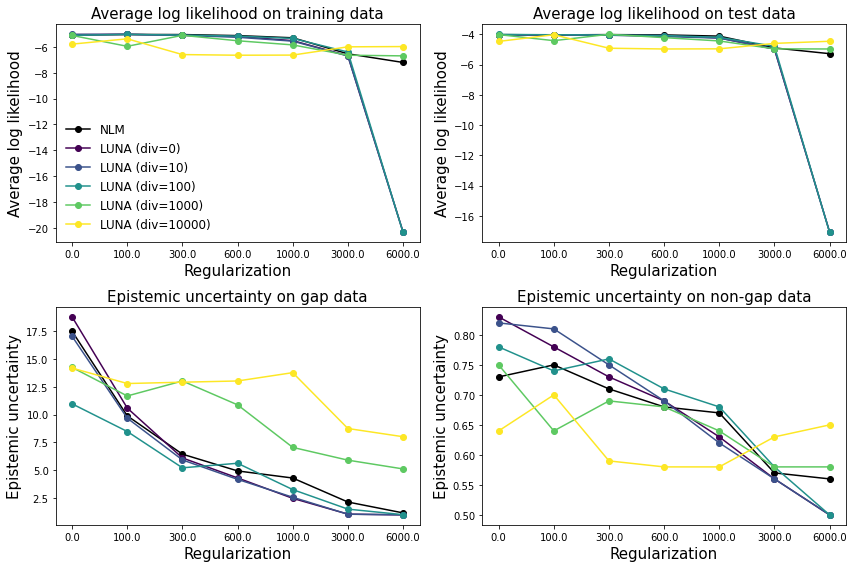

In [37]:
cmap = plt.get_cmap('viridis', len(div_grid))
fontsize = 15
fig, axes = plt.subplots(2,2,figsize = (12,8))
axes[0,0].plot(-np.array(nll_train_list_nlm),'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[0,0].plot(-np.array(nll_train_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={int(div)})")
axes[0,0].set_xticks(range(len(reg_grid)))
axes[0,0].set_xticklabels(np.array(reg_grid))
axes[0,0].set_xlabel('Regularization',fontsize = fontsize)
axes[0,0].set_ylabel('Average log likelihood',fontsize = fontsize)
# axes[0,0].set_ylim([-23,-3])
axes[0,0].legend(frameon=False,fontsize = 12)
axes[0,0].set_title('Average log likelihood on training data',fontsize = fontsize)

axes[0,1].plot(-np.array(nll_test_list_nlm),'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[0,1].plot(-np.array(nll_test_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[0,1].set_xticks(range(len(reg_grid)))
axes[0,1].set_xticklabels(np.array(reg_grid))
axes[0,1].set_xlabel('Regularization',fontsize = fontsize)
axes[0,1].set_ylabel('Average log likelihood',fontsize = fontsize)
# axes[0,1].set_ylim([-23,-3])
# axes[0,1].legend(frameon=False)
axes[0,1].set_title('Average log likelihood on test data',fontsize = fontsize)

axes[1,0].plot(eps_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[1,0].plot(np.array(eps_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[1,0].set_xticks(range(len(reg_grid)))
axes[1,0].set_xticklabels(np.array(reg_grid))
axes[1,0].set_xlabel('Regularization',fontsize = fontsize)
axes[1,0].set_ylabel('Epistemic uncertainty',fontsize = fontsize)
# axes[1,0].set_ylim([0,22])
# axes[1,0].legend(frameon=False)
axes[1,0].set_title('Epistemic uncertainty on gap data',fontsize = fontsize)

axes[1,1].plot(eps_non_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    axes[1,1].plot(np.array(eps_non_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
axes[1,1].set_xticks(range(len(reg_grid)))
axes[1,1].set_xticklabels(np.array(reg_grid))
axes[1,1].set_xlabel('Regularization',fontsize = fontsize)
axes[1,1].set_ylabel('Epistemic uncertainty',fontsize = fontsize)
# axes[1,1].set_ylim([0,22])
# axes[1,1].legend(frameon=False)
axes[1,1].set_title('Epistemic uncertainty on non-gap data',fontsize = fontsize)

plt.tight_layout()
plt.savefig(imagePath+'evaluation_3_aux_2000_steps.png',dpi = 150)
plt.show()

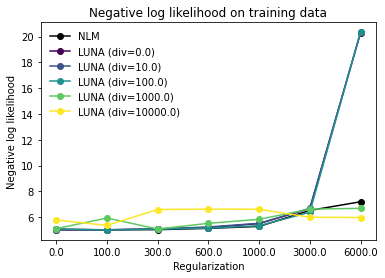

In [21]:
cmap = plt.get_cmap('viridis', len(div_grid))
plt.plot(nll_train_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(nll_train_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Negative log likelihood')
plt.legend(frameon=False)
plt.title('Negative log likelihood on training data')
plt.show()

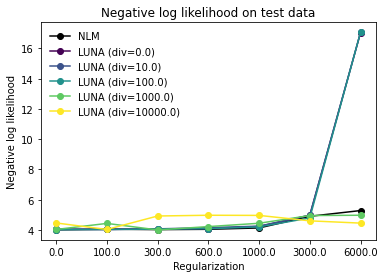

In [22]:
plt.plot(nll_test_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(nll_test_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Negative log likelihood')
plt.legend(frameon=False)
plt.title('Negative log likelihood on test data')
plt.show()

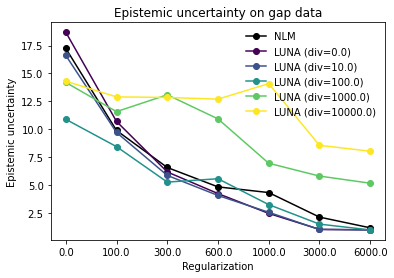

In [23]:
plt.plot(eps_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(eps_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Epistemic uncertainty')
plt.legend(frameon=False)
plt.title('Epistemic uncertainty on gap data')
plt.show()

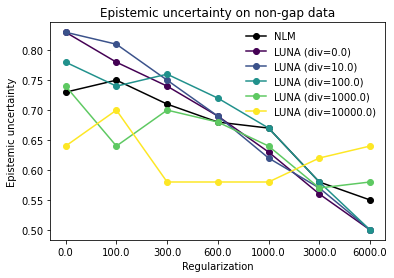

In [24]:
plt.plot(eps_non_gap_list_nlm,'k-o', label='NLM')
for idx, div in enumerate(div_grid):
    plt.plot(np.array(eps_non_gap_list_luna).reshape(len(div_grid), len(reg_grid))[idx,:],'-o', color = cmap(idx), label=f"LUNA (div={div})")
plt.xticks(range(len(reg_grid)),labels=reg_grid)
plt.xlabel('Regularization')
plt.ylabel('Epistemic uncertainty')
plt.legend(frameon=False)
plt.title('Epistemic uncertainty on non-gap data')
plt.show()